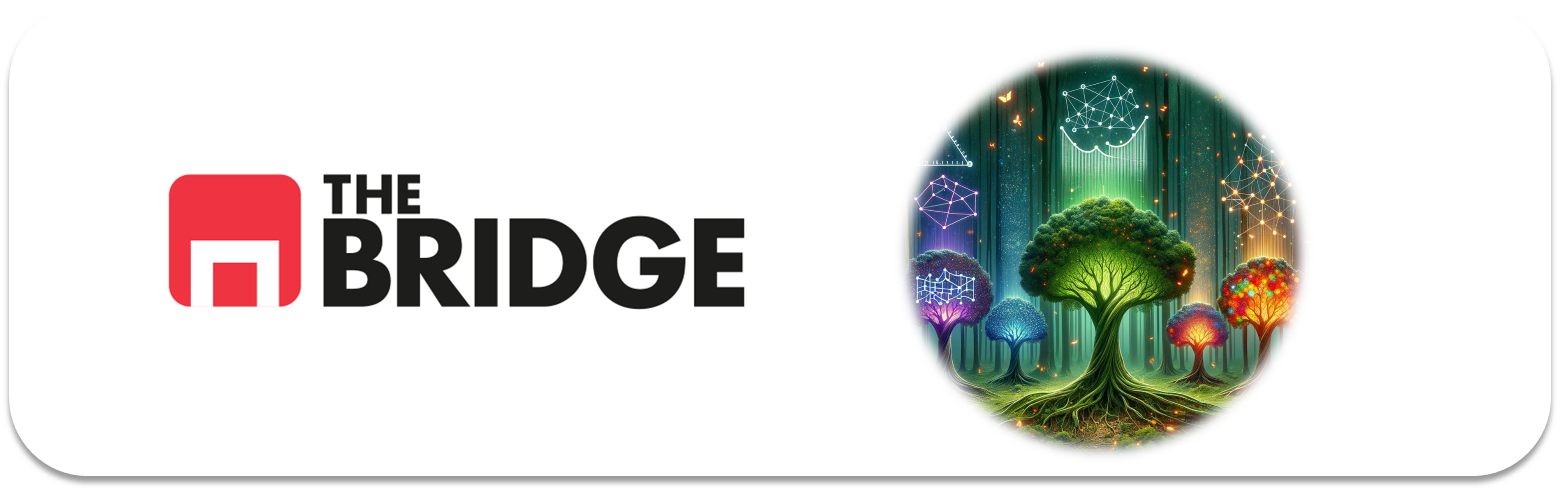

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [23]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_diabetes = pd.read_csv(url, names=names)

In [24]:
df_diabetes

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [25]:
df_tipificacion = pd.DataFrame([df_diabetes.nunique(), df_diabetes.nunique()/len(df_diabetes) * 100, df_diabetes.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
preg,17,2.213542,int64
plas,136,17.708333,int64
pres,47,6.119792,int64
skin,51,6.640625,int64
test,186,24.21875,int64
mass,248,32.291667,float64
pedi,517,67.317708,float64
age,52,6.770833,int64
class,2,0.260417,int64


In [26]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
target = "class"
df_diabetes[target].value_counts(True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

# Train y Test

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_diabetes,test_size=0.2,random_state=42)
X_train = train.drop(columns = target)
y_train = train[target]
X_test = test.drop(columns = target)
y_test = test[target]

# MINI EDA

In [29]:
df_diabetes.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


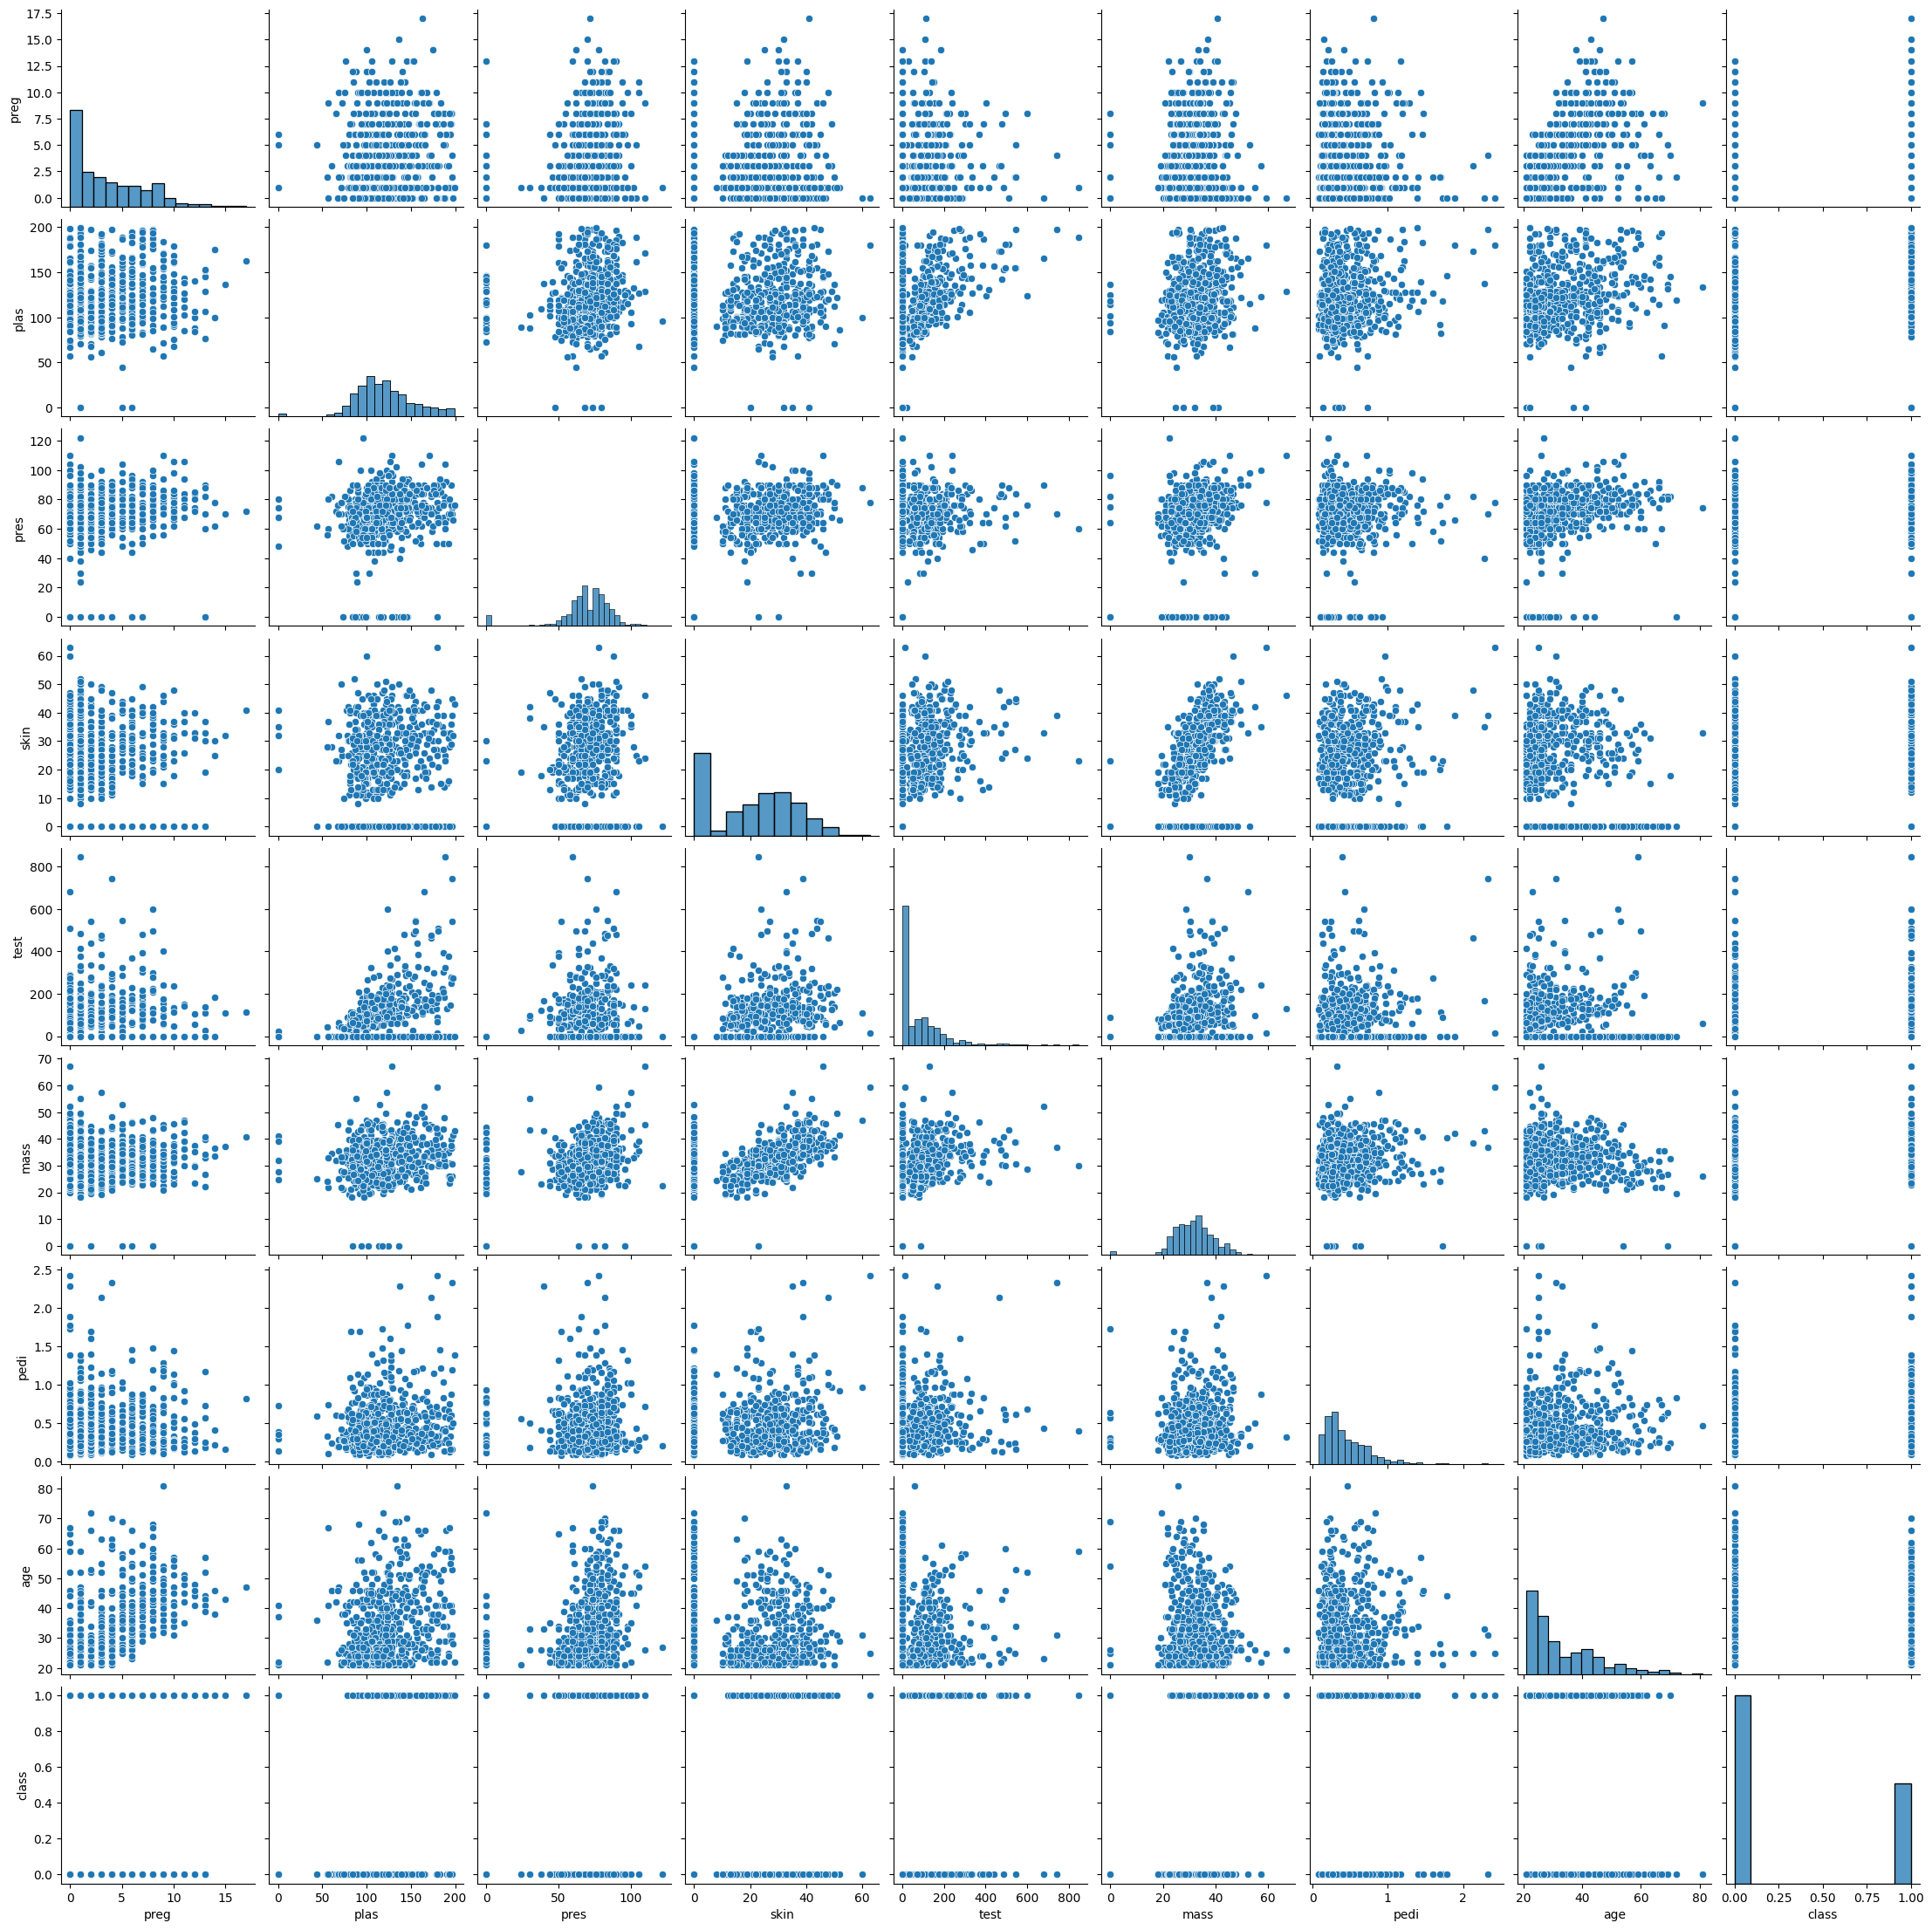

In [30]:
sns.pairplot(train)

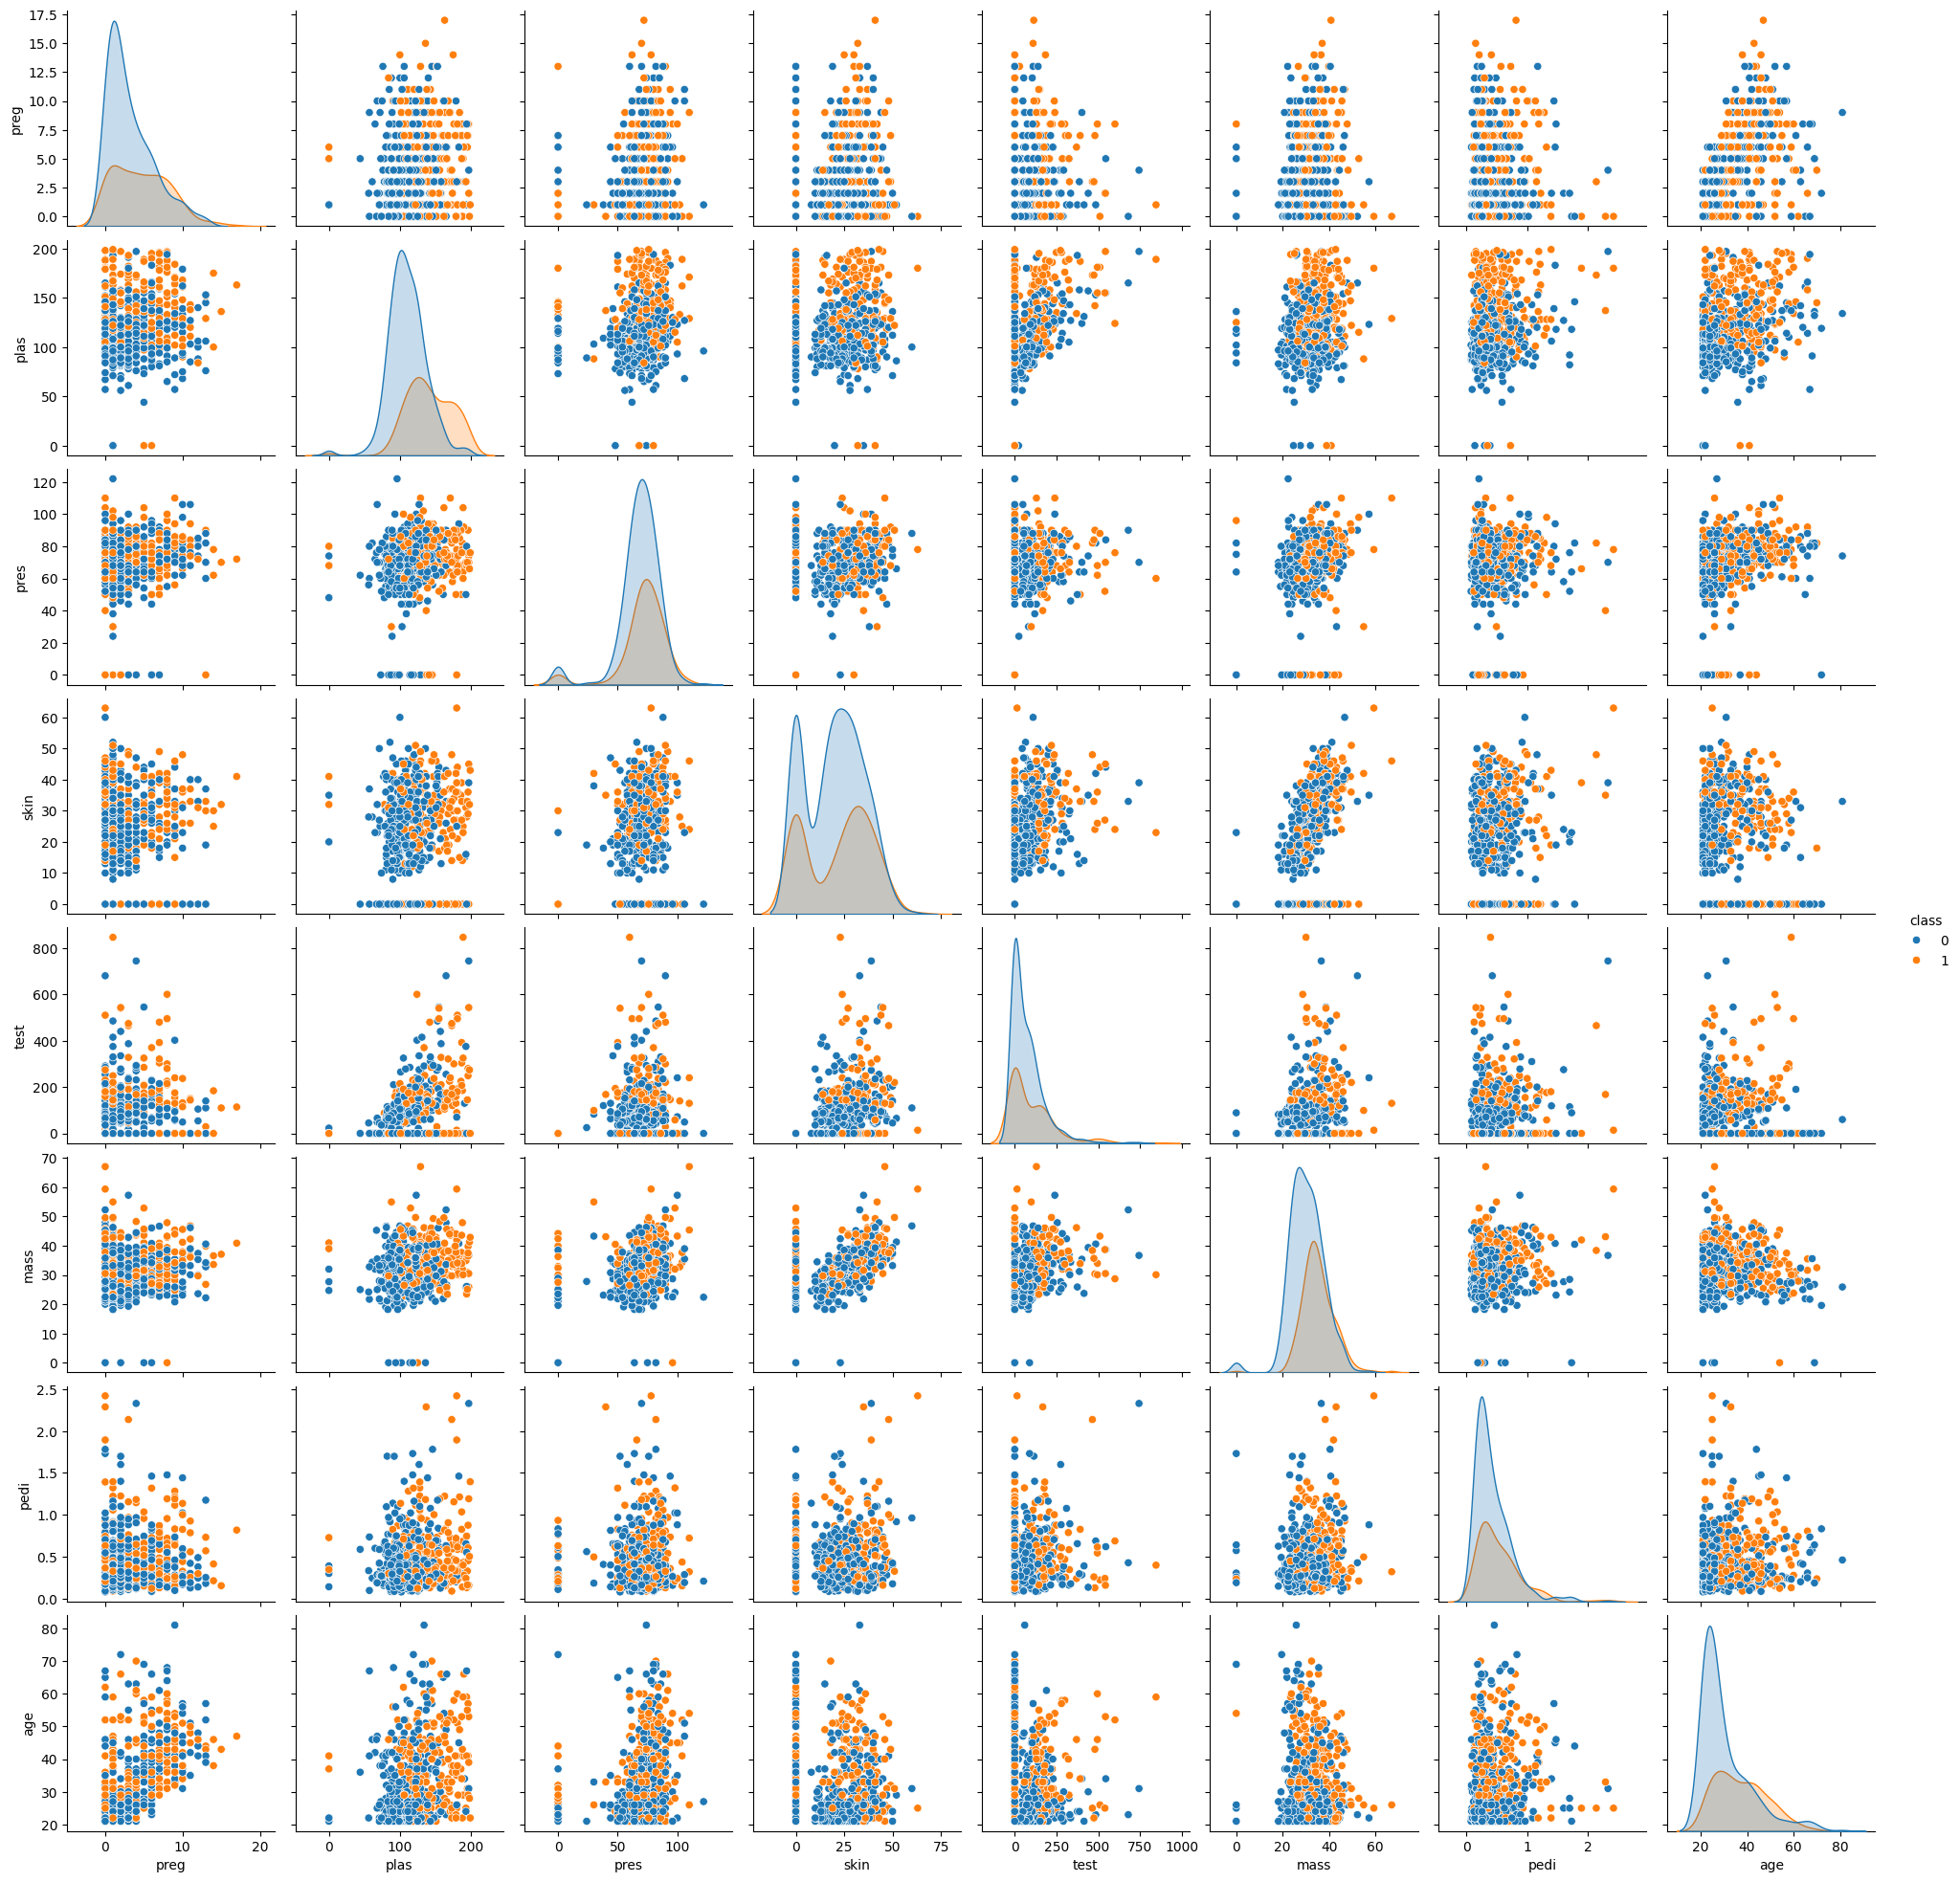

In [31]:
sns.pairplot(train,hue = target)

In [32]:
# Nos quedamos con estas variables

features = ['preg','plas','test','mass','pedi','age']

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>],
       [<Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

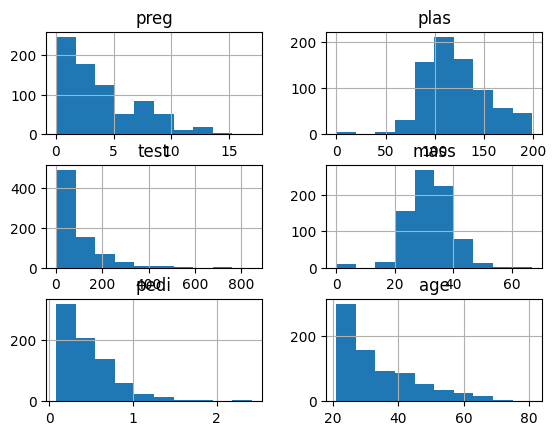

In [33]:
df_diabetes.hist(column=features)

In [34]:
X_train.drop(columns = ['skin','pres'], inplace = True)
X_train

,preg,plas,test,mass,pedi,age
60,2,84,0,0.0,0.304,21
618,9,112,0,28.2,1.282,50
346,1,139,83,28.7,0.654,22
294,0,161,0,21.9,0.254,65
231,6,134,370,46.2,0.238,46
...,...,...,...,...,...,...
71,5,139,140,28.6,0.411,26
106,1,96,0,22.4,0.207,27
270,10,101,0,45.6,1.136,38
435,0,141,0,42.4,0.205,29


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)

scaler.fit(X_train)
data_transformed = scaler.transform(X_train)
X_train = pd.DataFrame(data_transformed)
X_train.describe()

,0,1,2,3,4,5
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,1.735854e-17,-2.169817e-17,-2.603780e-17,-5.699386e-16,1.562268e-16,-3.761016e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.130523e+00,-3.775663e+00,-7.012055e-01,-4.135256e+00,-1.162210e+00,-1.035940e+00
25%,-8.284601e-01,-6.515379e-01,-7.012055e-01,-6.313921e-01,-6.764304e-01,-7.749361e-01
50%,-2.243336e-01,-1.204366e-01,-3.352683e-01,2.147879e-03,-2.872124e-01,-3.399290e-01
75%,6.818561e-01,5.668710e-01,4.159792e-01,5.678085e-01,4.295726e-01,6.170866e-01
max,4.004552e+00,2.441346e+00,6.583098e+00,4.540363e+00,5.796175e+00,4.184145e+00


In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [37]:
modelos_nombre = ["Logistic Regression","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

modelos = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

In [41]:
resultado = {}
valores = []
for nombre,modelo in zip(modelos_nombre, modelos):
    print(modelo)
    resultado[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(resultado[nombre]))
mejor = list(resultado.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)


In [42]:
for modelo_nombre, valores in resultado.items():
    print(f"Model <{modelo_nombre}>, Accuracy_CV: {np.mean(valores)}")
print(f"El mejor modelo es {mejor}")

Model <Logistic Regression>, Accuracy_CV: 0.7638051968754982
Model <DecisionTree>, Accuracy_CV: 0.7019767256496094
Model <Random Forest>, Accuracy_CV: 0.7638291088793241
Model <XGBoost>, Accuracy_CV: 0.744300972421489
Model <LightGBM>, Accuracy_CV: 0.7459349593495935
Model <CatBoost>, Accuracy_CV: 0.7605770763589988
El mejor modelo es Random Forest


In [46]:
params_grid = {
    "n_estimators": [150,250,450],
    "max_depth": [1,5,9],
    "min_samples_leaf": [10,20,30],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.4,0.5,0.6]
}

randfor_grid = GridSearchCV(rf_clf,
                       param_grid= params_grid,
                       cv = 3,
                       scoring = "accuracy",
                       n_jobs = -1)

randfor_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.4, 0.5, 0.6],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [150, 250, 450]},
             scoring='accuracy')

In [48]:
randfor_grid.best_score_

0.768691216323928

In [47]:
params_grid = {
    "n_estimators": [350,400,450],
    "max_depth": [4,6,8],
    "min_samples_leaf": [3,9,27],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.6,0.9,1.2]
}

randfor_grid = GridSearchCV(rf_clf,
                       param_grid= params_grid,
                       cv = 3,
                       scoring = "accuracy",
                       n_jobs = -1)

randfor_grid.fit(X_train, y_train)

c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Luis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.6, 0.9, 1.2],
                         'min_samples_leaf': [3, 9, 27],
                         'n_estimators': [350, 400, 450]},
             scoring='accuracy')

In [49]:
randfor_grid.best_score_

0.768691216323928